In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# sample data:
    
bc_data=pd.read_csv('/Users/scheo/Documents/PythonPractice/sample_data/breast_cancer_data.csv')
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# In this data set, id = patient id, diagnosis (M=malign, B=benign) is the dependent variable, and everything else is considered attributes/explanatory variables for each patient.

# For the sake of exercise, let's just pick two attributes, say radius_mean and smoothness_mean. So in the data set, select the following: id, diagnosis and radius_mean


bc_subset=bc_data[['id','diagnosis','radius_mean','concavity_mean']]

In [ ]:
sns.pairplot(bc_data,hue='diagnosis')

KeyboardInterrupt: 

In [5]:
# using a pivot table ( by diagnosis ) look at how radius_mean differs in each group
bc_subset.pivot_table(columns='diagnosis',values=['radius_mean','concavity_mean'])

diagnosis,B,M
concavity_mean,0.046058,0.160775
radius_mean,12.146524,17.462830


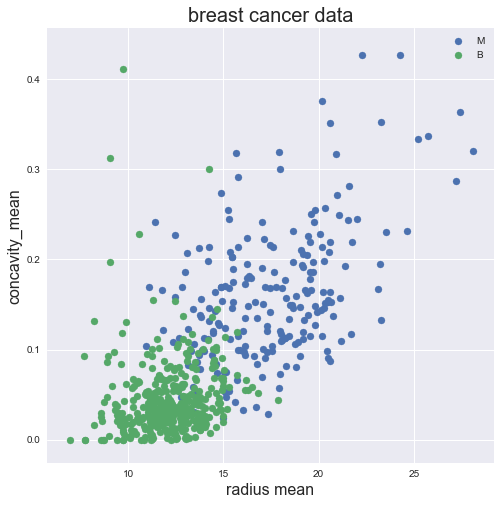

In [6]:
fig1,ax =plt.subplots(1,1,figsize=(8,8))
for d in set(bc_subset['diagnosis']):
    plt.scatter(data=bc_subset[bc_subset['diagnosis']==d],x='radius_mean',y='concavity_mean',label=str(d))
    ax.legend()
ax.set_title('breast cancer data',fontsize=20)
ax.set_xlabel('radius mean',fontsize=16)
ax.set_ylabel('concavity_mean',fontsize=16)



In [75]:
# let's try some machine learning on this data set
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model
from sklearn import cross_validation

__Splitting data into training and testing sets:__

In machine learning, the idea is that given a dataset, we split it into training set and testing sets as a way to evaluate the performance of an algorithm

For example, let's say 70% of the dataset goes into training, this means that the machine learning algorithm we're apply would be based on the observations in the 80% of the samples. For the remaining 30%, we pretend they are 'new' data, where we apply the model and predict the outcome

__There are differnt ways to split a dataset into train and test sets, you can use a prepackaged module:__ 
``` python 
from sklearn.model_selection import train_test_split 
```
__you could also use the ```python sample ``` function from pandas to pick a ratio of samples from your dataset and create a training set that way__



In [7]:
from sklearn.model_selection import train_test_split 
train,test = train_test_split(bc_subset,test_size=0.3)


In [8]:
?train_test_split

In [9]:
M_ratio_train=round(100*len(train[train['diagnosis']=='M'])/len(train),2)
print('There is '+ str(M_ratio_train) + '% Malignant samples in the training set')
train.pivot_table(columns='diagnosis',aggfunc=len)


There is 37.69% Malignant samples in the training set


diagnosis,B,M
concavity_mean,248.0,150.0
id,248.0,150.0
radius_mean,248.0,150.0


In [10]:
M_ratio_test=round(100*len(test[test['diagnosis']=='M'])/len(test),2)
print('There is '+ str(M_ratio_test) + '% Malignant samples in the test set')
#len(test[test['diagnosis']=='M'])/len(test)
test.pivot_table(columns='diagnosis',aggfunc=len)


There is 36.26% Malignant samples in the test set


diagnosis,B,M
concavity_mean,109.0,62.0
id,109.0,62.0
radius_mean,109.0,62.0


In [21]:
from sklearn.neighbors import KNeighborsClassifier
train,test = train_test_split(bc_subset,test_size=0.3)

# define the classifier:
clf= KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
# fit the classifier to the training data:
clf.fit(train[['radius_mean','concavity_mean']],train['diagnosis'])
# once we fit the model, let's predict on the test set:
preds=clf.predict(test[['radius_mean','concavity_mean']])

In [22]:
# Now, compare preds with test:
accu=(np.where(preds==test['diagnosis'],1,0).sum())/len(test)

In [23]:
accu

0.91228070175438591

In [15]:
preds

array(['M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M'], dtype=object)